In [ ]:
#| default_exp protocol

In [ ]:
#| include: false
from nbdev.showdoc import *

In [ ]:
#| export
import networkx as nx
from simpleeval import simple_eval#, DEFAULT_FUNCTIONS
from functools import lru_cache, cached_property
import matplotlib.pyplot as plt
# import dill as pickle

from qsample.circuit import Circuit,unpack

In [ ]:
# class Protocol:
#     """Representation of a Quantum protocol"""
    
#     def __init__(self, fault_tolerance_level=False, *args, **kwargs):
#         self.graph = nx.DiGraph(*args, **kwargs)
#         self.fault_tolerance_level = fault_tolerance_level
#         self._check_fns = DEFAULT_FUNCTIONS.copy()
#         self._check_fns.update(len=len, bin=bin)
#         self._circuits = {}
        
#     @property
#     def n_qubits(self):
#         return len(set(qb for c in self._circuits.values() for qb in unpack(c)))
        
#     def add_node(self, name, circuit):
#         self._circuits[circuit.id] = circuit
#         self.graph.add_node(name, circuit_id=circuit.id)
        
#     def add_edge(self, *args, **kwargs):
#         self.graph.add_edge(*args, **kwargs)
    
#     def add_nodes_from(self, *args, **kwargs):
#         self.graph.add_nodes_from(*args, **kwargs)
    
#     def update_node(self, node, circuit):
#         self._circuits[circuit.id] = circuit
#         self.graph.nodes[node]['circuit_id'] = circuit.id
        
#     def add_nodes_from(self, names, circuits):
#         if not isinstance(circuits, (list,tuple,set)):
#             circuits = [circuits] * len(names)
#         for name, circuit in zip(names, circuits):
#             self.add_node(name, circuit)

#     # @cached_property
#     # def partition(self):
#     #     return {cid: circ.partition for cid,circ in self._circuits.items()}
    
#     @lru_cache(maxsize=128)
#     def checks(self, node):
#         adj_nodes = self.graph.out_edges(node)
#         return {pair[1]: self.graph.edges[pair]['check'] for pair in adj_nodes}
    
#     def save(self, path):
#         with open(path, 'wb') as fp:
#             pickle.dump(self, fp)
            
#     def load(self, path):
#         with open(path, 'rb') as fp:
#             res = pickle.load(fp)
#         self._circuits = res._circuits
#         self._check_fns = res._check_fns
#         self.fault_tolerant = res.fault_tolerant
#         return self
    
#     def __iter__(self):
#         node = 'START'
#         hist = {}
#         name_handler = lambda ast_node: hist.get(ast_node.id, None)
        
#         while node:
        
#             checks = {n: simple_eval(check, names=name_handler, functions=self._check_fns)
#                      for n,check in self.checks(node).items()}
#             next_nodes = [(nn,check) for nn,check in checks.items() if check]
            
#             if len(next_nodes) == 0:
#                 node = None
#             elif len(next_nodes) == 1:
#                 node, check_ret = next_nodes[0]
                
#                 if isinstance(check_ret, Circuit):
#                     self.update_node(node, check_ret)
                
#                 if not self.graph.out_edges(node): break
                
#                 circuit_id = self.graph.nodes(data='circuit_id')[node]
#                 circuit = self._circuits[circuit_id]
#                 yield node, circuit
#                 hist[node] = hist.get(node,[]) + [self.msmt]
#             else: 
#                 raise Exception(f"Too many checks True for node {node}.")
                
#         yield node, None
            
                
#     def send(self, msmt):
#         if msmt: self.msmt = int(msmt,2)
#         else: self.msmt = None
        
#     def draw(self, path=None, legend=False, figsize=(6,6), label_offset=(0.05,0.05)):
#         import matplotlib.pyplot as plt
#         plt.figure(figsize=figsize)
        
#         pos = nx.kamada_kawai_layout(self.graph)
#         size = max([len(n)**2 * 100 for n in pos.keys()])
#         col = ['#ff0000' if not self.graph.out_edges(n) else '#0080ff' if not self.graph.in_edges(n) else 'black' for n in self.graph.nodes]
#         nx.draw(self.graph, pos=pos, with_labels=True, node_color='white', node_size=size, edgecolors=col)
        
#         edge_lbls = nx.get_edge_attributes(self.graph, 'check')
#         if legend:
#             import matplotlib.lines as mlines
#             n_edge_lbls, legend_lbls = dict(), []
#             edge_cnt = 0
#             for (to,fr),lbl in edge_lbls.items():
#                 if lbl == 'True': n_edge_lbls[(to,fr)] = lbl
#                 else: 
#                     edge_cnt += 1
#                     n_edge_lbls[(to,fr)] = f"${edge_cnt}$"
#                     leg_lbl = mlines.Line2D([], [], color='black', marker=f'${edge_cnt}$', linestyle='None', markersize=8, label=lbl)
#                     legend_lbls.append(leg_lbl)
#             lgd = plt.legend(handles=legend_lbls, bbox_to_anchor=(1.04, 1), loc="upper left")
#             edge_lbls = n_edge_lbls
            
#         dx, dy = label_offset
#         loop_pos = {n:(x+dx, y+dy) for n,(x,y) in pos.items()}
#         loop_lbls = {(to,fr): lbl for (to,fr), lbl in edge_lbls.items() if to==fr}
#         lbls = {(to,fr): lbl for (to,fr), lbl in edge_lbls.items() if to!=fr}
#         edge_box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
#         nx.draw_networkx_edge_labels(self, pos, lbls, font_size=12, bbox=edge_box, rotate=False if legend else True)
#         nx.draw_networkx_edge_labels(self, loop_pos, loop_lbls, font_size=12, bbox=edge_box, rotate=True)
        
#         if path and legend: plt.savefig(save_path, bbox_extra_artists=(lgd,), bbox_inches='tight')
#         elif path: plt.savefig(path, bbox_inches='tight')

In [ ]:
#| export
def draw_protocol(protocol, path=None, legend=False, figsize=(6,6), label_offset=(0.05,0.05)):
    plt.figure(figsize=figsize)

    pos = nx.kamada_kawai_layout(protocol)
    size = max([len(n)**2 * 100 for n in pos.keys()])
    col = ['#ff0000' if not protocol.out_edges(n) else '#0080ff' if not protocol.in_edges(n) else 'black' for n in protocol.nodes]
    nx.draw(protocol, pos=pos, with_labels=True, node_color='white', node_size=size, edgecolors=col)

    edge_lbls = nx.get_edge_attributes(protocol, 'check')
    if legend:
        import matplotlib.lines as mlines
        n_edge_lbls, legend_lbls = dict(), []
        edge_cnt = 0
        for (to,fr),lbl in edge_lbls.items():
            if lbl == 'True': n_edge_lbls[(to,fr)] = lbl
            else: 
                edge_cnt += 1
                n_edge_lbls[(to,fr)] = f"${edge_cnt}$"
                leg_lbl = mlines.Line2D([], [], color='black', marker=f'${edge_cnt}$', linestyle='None', markersize=8, label=lbl)
                legend_lbls.append(leg_lbl)
        lgd = plt.legend(handles=legend_lbls, bbox_to_anchor=(1.04, 1), loc="upper left")
        edge_lbls = n_edge_lbls

    dx, dy = label_offset
    loop_pos = {n:(x+dx, y+dy) for n,(x,y) in pos.items()}
    loop_lbls = {(to,fr): lbl for (to,fr), lbl in edge_lbls.items() if to==fr}
    lbls = {(to,fr): lbl for (to,fr), lbl in edge_lbls.items() if to!=fr}
    edge_box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    nx.draw_networkx_edge_labels(protocol, pos, lbls, font_size=12, bbox=edge_box, rotate=False if legend else True)
    nx.draw_networkx_edge_labels(protocol, loop_pos, loop_lbls, font_size=12, bbox=edge_box, rotate=True)

    if path and legend: plt.savefig(save_path, bbox_extra_artists=(lgd,), bbox_inches='tight')
    elif path: plt.savefig(path, bbox_inches='tight')

In [ ]:
#| export
class Protocol(nx.DiGraph):
    """Representation of a Quantum (Error Correction) Protocol
    
    Attributes
    ----------
    ft_level : int
        Degree of fault tolerance. `ft_level` corresponds to the total subset weight
        of a circuit path which, when less than `ft_level` always lead to deterministic result
    check_functions : dict
        Functions used in transition checks between circuits
    circuits : dict
        Circuits used inside protocol, key: circuit id
    qubits : set
        All qubits "touched" by the circuits
    root : str
        Start node of the protocol
    """
    
    def __init__(self, ft_level=0, check_functions={}, *args, **kwargs):
        """
        Parameters
        ----------
        ft_level : int
            Degree of protocol fault tolerance
        check_functions : dict
            Functions used in transition checks between circuits
        *args, **kwargs
            Any arguments passed to parent class `DiGraph`
        """
        super().__init__(*args, **kwargs)
        self.ft_level = ft_level
        self.check_functions = check_functions
        self.circuits = dict()

    @cached_property
    def qubits(self):
        return set(qb for c in self.circuits.values() for qb in unpack(c))
    
    @cached_property
    def root(self):
        deg_0_nodes = [n for n,d in self.in_degree if d==0]
        assert(len(deg_0_nodes)==1), "Protocol can only start with one node of degree 0."
        return deg_0_nodes[0]
    
    def add_node(self, name, circuit=None):
        """Add node to protocol
        
        Parameters
        ----------
        name : str
            Name of the node (must be unique)
        circuit : Circuit
            Circuit associated with node
        """
        assert(name not in self.nodes), f"Node name {name} not unique"

        if circuit:
            self.circuits[circuit.id] = circuit
            circuit_id = circuit.id
        else:
            circuit_id = None
            
        super().add_node(name, circuit_id=circuit_id)
        
    def add_nodes_from(self, names, circuits):
        """Add list of nodes and corresponding circuits to protocol
        
        Parameters
        ----------
        names : list of str
            Names of nodes (must be unique)
        circuits : list of Circuit or Circuit
            Circuits corresponding to names
        """
        if not isinstance(circuits, (list,tuple,set)):
            circuits = [circuits] * len(names)
        for name, circuit in zip(names, circuits):
            self.add_node(name, circuit)
        
    def successor(self, name, hist={}):
        """Return successor node of node `name`
        
        Parameters
        ----------
        name : str
            Name of node of which the successor is determined
        hist : dict
            Meaurement history used to determine successor via transition checks
            
        Returns
        -------
        tuple
            (name of successor node or None, corresponding circuit or None)
        """
        assert(name in self.nodes), f"Node {name} not in protocol"
        checks = {pair[1]: simple_eval(self.edges[pair]['check'], 
                                       names=lambda n: hist.get(n.id, None), 
                                       functions=self.check_functions) 
                  for pair in self.out_edges(name)}
        next_nodes = [(n,check) for n,check in checks.items() if check]
        assert(len(next_nodes) <= 1), f"Too many checks True for for node {name}"
        if len(next_nodes) == 0:
            # No checks True: End protocol
            return None, None
        else:
            succ_name, check_return = next_nodes[0]
            if self.out_degree(succ_name) == 0:
                # Terminal node reached: End protocol
                return succ_name, None
            if isinstance(check_return, Circuit):
                # Correction node: Update circuits
                # self.circuits[check_return.id] = check_return ### !!! MUST FIX: ADD COR CIRCUITS.
                return succ_name, check_return
            return succ_name, self.circuits[ self.nodes(data='circuit_id')[succ_name] ]
    
    def draw(self, *args, **kwargs):
        """Draw protocol"""
        return draw_protocol(self, *args, **kwargs)

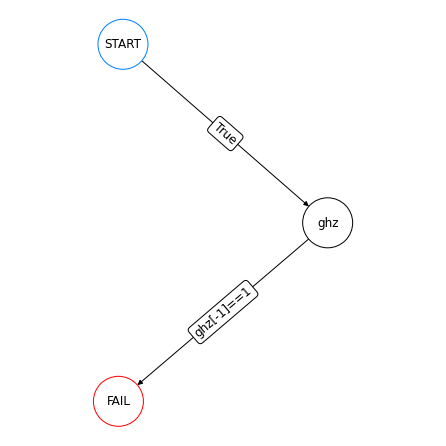

In [ ]:
from qsample.examples import ghz1

In [ ]:
assert(ghz1.successor('START', {})[0] == 'ghz')
assert(ghz1.successor('ghz', {'ghz': [1]})[0] == 'FAIL')
ghz1.successor('ghz', {'ghz': [1]})

('FAIL', None)

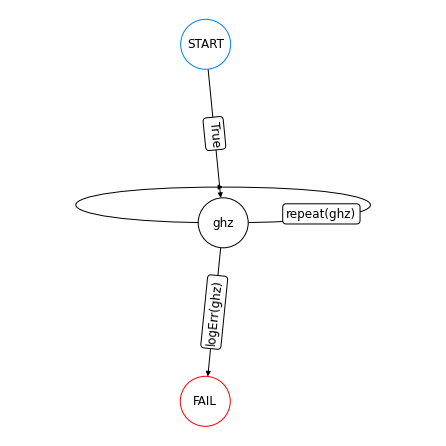

In [ ]:
from qsample.circuit import Circuit

ghz = Circuit([ {"init": {0,1,2,3,4}},
                {"H": {0}},
                {"CNOT": {(0,1)}},
                {"CNOT": {(1,2)}},
                {"CNOT": {(2,3)}},
                {"CNOT": {(3,4)}},
                {"CNOT": {(0,4)}},
                {"measure": {4}}   ], ff_det=True)

def gen_ghz3():
    
    def repeat(m):
        return len(m) < 3 and m[-1] == 1

    def logErr(m):
        return len(m) >= 3 and sum(m) == len(m)

    functions = {'logErr': logErr, 'repeat': repeat}

    ghz3 = Protocol(ft_level=1, check_functions=functions)
    ghz3.add_node('ghz', circuit=ghz)
    
    ghz3.add_edge('START', 'ghz', check='True')
    ghz3.add_edge('ghz', 'ghz', check='repeat(ghz)')
    ghz3.add_edge('ghz', 'FAIL', check='logErr(ghz)')
    
    return ghz3
ghz3 = gen_ghz3()
ghz3.draw()

In [ ]:
assert(ghz3.successor('START', {})[0] == 'ghz')
assert(ghz3.successor('ghz', {'ghz': [1]})[0] == 'ghz')
assert(ghz3.successor('ghz', {'ghz': [1,1,1]})[0] == 'FAIL')